# Исследовательский анализ данных о продаже недвижимости

>[Исследовательский анализ данных о продаже недвижимости](#scrollTo=1yLEeLNgOoZb)

>>[Загрузка и осмотр данных](#scrollTo=wClwSEVXPpXr)

>>>[Открываем файл](#scrollTo=3FyJobhBTSpq)

>>>[Строим гистограммы](#scrollTo=hf1gVdb2WsCB)

>>[Предобработка данных](#scrollTo=tCgwBURKh2Os)

>>>[Заполнение пропусков](#scrollTo=sdDs4QbriAOb)

>>>[Пропуски в столбцах locality_name, floors_total, is apartment](#scrollTo=R__Wg0eyss9P)

>>>[Пропуски в столбцах living_area, kitchen_area](#scrollTo=WWwkm-D5tC5g)

>>>[Пропуски в столбцах days_exposition и ceiling_height](#scrollTo=QrV_n0cY9aSZ)

>>>[Пропуски в столбце balcony](#scrollTo=nRVwXG7vrYKu)

>>>[Преобразование типов данных](#scrollTo=K5gjp_FV9gOE)

>>>[Изменение типа данных в столбце first_day_exposition](#scrollTo=Ax8UG2GiB6Ms)

>>>[Изменение типа данных в столбцах last_price, days_exposition, balcony](#scrollTo=xBCZOLlYkL1T)

>>>[Унифицирование значений столбца locality_name](#scrollTo=femDau7Tv8Vj)

>>>[Удаление неявных дубликатов](#scrollTo=nzqqFTxc8IHz)

>>>[Пропуски в столбцах parks_around3000,parks_nearest, ponds_around3000, ponds_nearest, airports_nearest, cityCenters_nearest](#scrollTo=JXzypLcx7ZgK)

>>[Новые параметры для анализа](#scrollTo=wktxdEdHc76S)

>>>[one_square_price](#scrollTo=Y1FmrLc2-u_R)

>>>[weekday](#scrollTo=9TerK5Iw-5qg)

>>>[month_exposition](#scrollTo=jKf5UVWw-9eh)

>>>[year_exposition](#scrollTo=n8SpFEl6_CKK)

>>>[floor_type](#scrollTo=NfiWo-8V_GOQ)

>>>[cityCenter_kilometers](#scrollTo=2EOXvcoBADHQ)

>>[Исследовательский анализ данных](#scrollTo=wuQ3Ej9aAbzY)

>>>[Изучение предложенных параметров](#scrollTo=P7sW3yb2HEH4)

>>>[Обработка аномальных значений](#scrollTo=07TZKGMCHSI1)

>>>[Аномалии в rooms](#scrollTo=txZK9770ov0x)

>>>[Аномалии в ceiling_height](#scrollTo=nHXOxUD3u2u_)

>>>[Аномалии в parks_nearest](#scrollTo=HxYOkWzZ3ioQ)

>>>[Изучение скорости продажи квартир](#scrollTo=ojrcVII4C_JM)

>>>[Определение факторов, влияющих на стоимость](#scrollTo=L2Diy6gYHQpb)

>>>[Выделение населенных пунктов с самой высокой и низкой стоимостью квадратного метра](#scrollTo=m1RcLPdcfejF)

>>>[Влияние расстояния до центра на цену квартиры в Санкт-Петербурге](#scrollTo=i14Qus4SreRr)

>>[Общий вывод](#scrollTo=IjQwgZsHzgTl)




## Загрузка и осмотр данных




### Открываем файл



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data = pd.read_csv('/content/drive/MyDrive/real_estate_data.csv')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

In [ ]:
print(data.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

Это не тот результат, который ожидался. Данные представляются неверно, потому что в файле использован другой разделитель.
Учтем это при новой попытке чтения файла.

In [ ]:
try:
    data = pd.read_csv('/content/drive/MyDrive/real_estate_data.csv', sep='\\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t')

data.info()

/tmp/ipykernel_63/2441185973.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/content/drive/MyDrive/real_estate_data.csv', sep='\\t')
/tmp/ipykernel_63/2441185973.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Первые наблюдения:**
*   В данных много пропусков (`ceiling_height`, `floors_total`, `living_area` и т.д.)
*   Некоторые данные представлены не в том типе (например, `first_day_exposition`).



### Строим гистограммы

Построим гистограммы для всех числовых значений на одном графике.

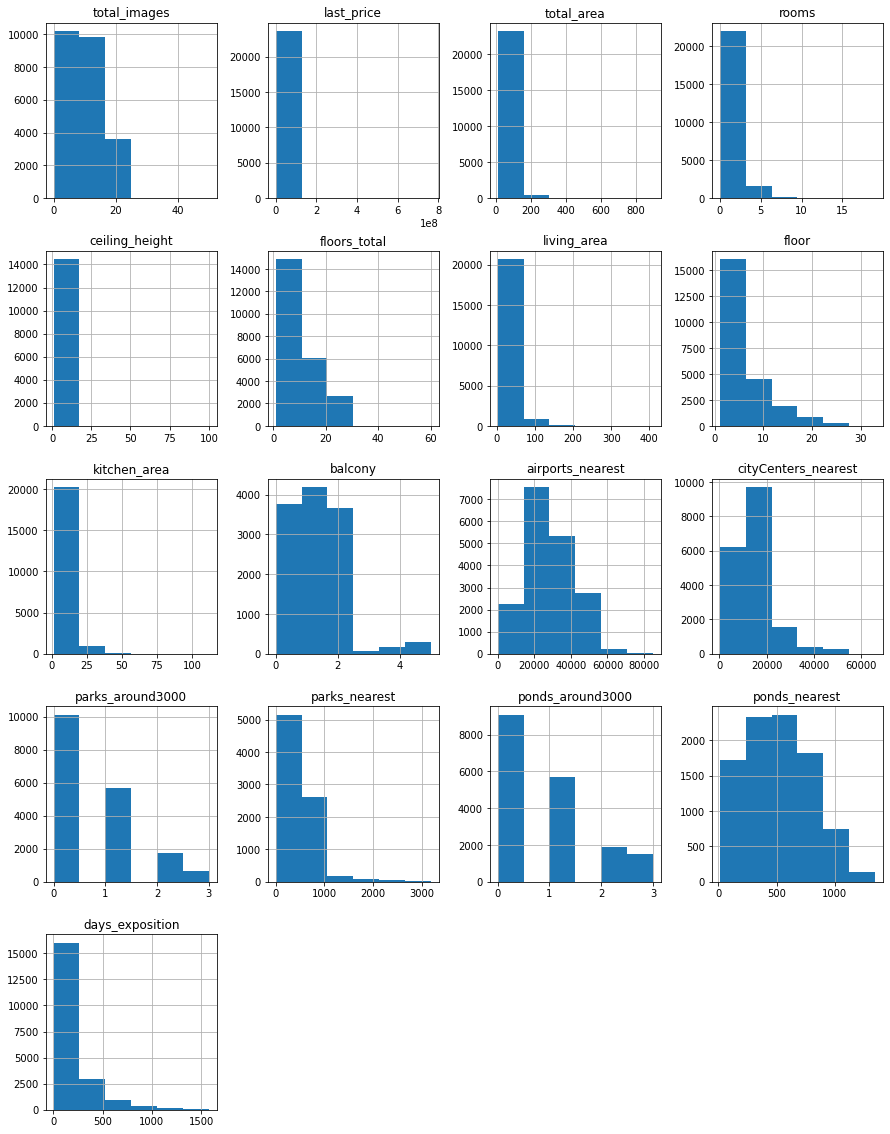

In [ ]:
data.hist(figsize=(15, 20), bins=6)
plt.show()

**Предварительные выводы:**

*   Заметны неправдоподобные значения в столбце `ceiling_height` (25 м и
больше).
*   По гистограммам некоторых столбцов, заполняемых пользователями (например, `last_price`), сложно что-либо сказать. Картину искажают несколько (или даже одно) слишком больших значений, а также значительное число пропусков.
*   Гистограммы столбцов, запоненных автоматически (`airpotrs_nearest`, `cityCenters_nearest`, `ponds_nearest`), похожи на нормальное распределение и не вызывают подозрений.







## Предобработка данных

### Заполнение пропусков

Посчитаем пропуски в каждом столбце. И выведем список столбцов с пропусками, отсортированный по возрастанию.

In [ ]:
data_gaps = data.isna().sum()
data_gaps = data_gaps[data_gaps>0].sort_values()
data_gaps

locality_name             49
floors_total              86
living_area             1903
kitchen_area            2278
days_exposition         3181
parks_around3000        5518
ponds_around3000        5518
cityCenters_nearest     5519
airports_nearest        5542
ceiling_height          9195
balcony                11519
ponds_nearest          14589
parks_nearest          15620
is_apartment           20924
dtype: int64

### Пропуски в столбцах `locality_name`, `floors_total`, `is apartment`

Строки, в которых пропущены значения столбцов `locality_name` и `floors_total` можно было бы удалить методом `.dropna()`.

Их очень мало, и это не должно отразиться на данных в целом.

Однако мы постараемся сохранить как можно больше данных, поэтому удалять ничего не будем.

Пропуски в столбце `locality_name` заменим на `нет данных`.

In [ ]:
data['locality_name'] = data['locality_name'].fillna('нет данных')
data['locality_name'].isna().sum()

0

Посмотрим на значения столбца `floor` в строках, где в столбце `floors_total` встречаются пропуски, чтобы выяснить, насколько эти пропуски случайны.

Возможно, пользователи не указывают общее количество этажей, если квартира находится на первом этаже.

In [ ]:
data[data['floors_total'].isna()]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
5      4
7      4
21     4
15     3
19     3
18     3
1      3
13     3
11     3
10     3
14     2
2      2
20     2
24     2
17     1
22     1
23     1
Name: floor, dtype: int64

Предположение не подтвердилось. Пропуски выглядят случайными.

Обратимся к наиболее часто встречающимся значениям столбца `floors_total` и заполним пропуски теми из них, которые соответствуют здравому смыслу (не меньше значения `floor`).

In [ ]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [ ]:
data.loc[(data['floor']<=5) & (data['floors_total'].isna()), 'floors_total'] = 5
data.loc[(data['floor']<=9) & (data['floors_total'].isna()), 'floors_total'] = 9
data.loc[(data['floor']<=25) & (data['floors_total'].isna()), 'floors_total'] = 25
data['floors_total'].isna().sum()

0

Также можно было бы удалить столбец `is_apartment`, потому что он почти целиком состоит из пропусков.

Логично предположить, что в данном случае пропуск подразумевает False. Так и заполним.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

### Пропуски в столбцах `living_area`, `kitchen_area`

Проверим, есть ли взаимосвязь между:
* `living_area` и `total_area`
* `kitchen_area` и `total_area`
* `kitchen_area` и разницей (`total_area` - `living_area`)

In [ ]:
print(
    'Корреляция между жилой и общей площадью:',
      data['living_area'].corr(data['total_area'])
)
print(
    'Корреляция между кухней и общей площадью:',
      data['kitchen_area'].corr(data['total_area'])
)
print(
    'Корреляция между кухней и разницей общей и жилой площади:',
      data['kitchen_area'].corr(data['total_area']-data['living_area'])
)


Корреляция между жилой и общей площадью: 0.9395373338721493
Корреляция между кухней и общей площадью: 0.6091211711198318
Корреляция между кухней и разницей общей и жилой площади: 0.7350690887752214


Сильная корреляция между жилой и общей площадью. Значит, пропуски в `living_area` можно заменить на основе значений `total_area`, применив метод `cut()` и рассчитав медиану жилой площади для каждого сегмента.

In [ ]:
data['area_group'] = pd.cut(data['total_area'], bins=15, labels=False)

for a in data['area_group'].unique():
    data.loc[(data['area_group'] == a) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['area_group'] == a), 'living_area'].median()

data['living_area'].isna().sum()

0

Кроме того, мы видели достаточно сильную корреляцию между площадью кухни и разницей площади общей и жилой. Поэтому пропуски в `kitchen_area` восстановим на основе этого показателя тем же способом.

In [ ]:
data['area_del'] = data['total_area'] - data['living_area']
data['area_del_group'] = pd.cut(data['area_del'], bins=15, labels=False)

for a in data['area_del_group'].unique():
    data.loc[(data['area_del_group'] == a) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['area_del_group'] == a), 'kitchen_area'].median()

data['kitchen_area'].isna().sum()

0

### Пропуски в столбцах `days_exposition` и `ceiling_height`

Внимательно посмотрим на данные в столбце `days_exposition`.

In [ ]:
import statistics as stat
print('mode', stat.mode(data['days_exposition']))
print('median', data['days_exposition'].median())
data['days_exposition'].describe()

mode 45.00000000000001
median 95.0


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Мода, медиана и среднее сильно отличаются друг от друга, стандартное отклонение тоже велико.

Заполнять пропуски статистическими величинами в подобных случаях не стоит, поэтому оставим пропуски.

Теперь обратимся к данным из столбца `ceiling_height`.

In [ ]:
print('mode', stat.mode(data['ceiling_height']))
data['ceiling_height'].describe()

mode 2.5


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Пропуски можно заменить на моду. Это стандартная высота потолка.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(stat.mode(data['ceiling_height']))
data['ceiling_height'].isna().sum()

0

### Пропуски в столбце `balcony`

Наиболее вероятно, что большая часть пропусков в этом столбце обусловлена тем, что пользователи сочли очевидным: если балконов нет, о них не нужно ничего указывать.

Поэтому заменим пропуски в столбце `balcony` на 0

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

### Преобразование типов данных

Еще раз посмотрим на типы данных в столбцах и заодно на оставшиеся пропуски.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Не соответствуют ожиданиям типы данных в столбцах:
* `first_day_exposition` (`object` вместо `datetime`)
* `last_price` (`float64` вместо `int64`)
* `balcony` (`float64` вместо `int64`)
* `parks_around3000` (`float64` вместо `int64`)
* `ponds_around3000` (`float64` вместо `int64`)
* `days_exposition` (`float64` вместо `int64`)

### Изменение типа данных в столбце `first_day_exposition`

Посмотрим, в каком формате указана дата в этом столбце.

И преобразуем строку в дату, используя метод `.to_datetime()`

In [ ]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

### Изменение типа данных в столбцах `last_price`, `days_exposition`, `balcony`

Посмотрим на уникальные значения в столбцах:
* `last_price`
* `balcony`
* `parks_around3000`
* `ponds_around3000`
* `days_exposition`

Проверим, действительно ли данные в них должны иметь тип `int64`

In [ ]:
print('Уникальные значения last_price:',
      data['last_price'].unique())
print('Уникальные значения balcony:',
      data['balcony'].unique())
print('Уникальные значения parks_around3000:',
      data['parks_around3000'].unique())
print('Уникальные значения ponds_around3000:',
      data['ponds_around3000'].unique())
print('Уникальные значения days_exposition:',
      data['days_exposition'].unique())

Уникальные значения last_price: [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
Уникальные значения balcony: [0. 2. 1. 5. 4. 3.]
Уникальные значения parks_around3000: [ 1.  0.  2. nan  3.]
Уникальные значения ponds_around3000: [ 2.  0.  3.  1. nan]
Уникальные значения days_exposition: [  nan   81.  558. ... 1360. 1007.  971.]


Действительно, тип `float64` здесь не нужен. Логично будет его изменить на `int32`, поскольку целые числа легче воспринимаются зрительно и больше соответствуют действительности.

Изменим тип данных для столбцов `last_price`, `days_exposition`, `balcony`, избегая пропущенных значений в столбце `days_exposition`.

In [ ]:
data['last_price'] = data['last_price'].astype('int32')
data.loc[~data['days_exposition'].isna(), 'days_exposition'] = data.loc[~data['days_exposition'].isna(),
                                                                        'days_exposition'].astype('int32')
data['balcony'] = data['balcony'].astype('int32')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

К остальным столбцам вернемся позднее, когда заполним пропуски в них. Ключом к недостающим значениям станут данные из столбца `locality_name`. Но чтобы ими воспользоваться, нужно сначала их обработать.

### Унифицирование значений столбца `locality_name`

### Удаление неявных дубликатов

Выведем список уникальных значений этого столбца, чтобы найти неявные дубликаты.

In [ ]:
print(data['locality_name'].unique())
data['locality_name'].nunique()

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

365

Создадим новый столбец, где оставим только имена собственные, без слов "деревня", "поселок" и т.д.

In [ ]:
data['locality_name_clear'] = (
    data['locality_name'].str
    .replace('ё', 'е')
    .replace(['поселок ', 'городского типа ', 'деревня ', 'городской ',
              'садовое товарищество ', 'коттеджный ', 'село ', 'станции ',
              'садоводческое некоммерческое товарищество ', 'имени ', 'при железнодорожной '], '', regex=True)
)
print(data['locality_name_clear'].unique())
data['locality_name_clear'].nunique()

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

306

### Пропуски в столбцах `parks_around3000`,`parks_nearest`, `ponds_around3000`, `ponds_nearest`, `airports_nearest`, `cityCenters_nearest`


Теперь восстановим пропущенные значения в столбцах:
* `parks_around3000`
* `parks_nearest`
* `ponds_around3000`
* `ponds_nearest`
* `airports_nearest`
* `cityCenters_nearest`

Используем для этого медиану соответствующих столбцов для каждого населенного пункта, о котором собрано достаточно данных для вычисления.

Пропуски для остальных населенных пунктов заполним общей медианой по столбцу.

Заполним пропуски в столбце `parks_around3000`.

In [ ]:
for name in data['locality_name_clear'].unique():

    data.loc[(data['locality_name_clear'] == name) & (data['parks_around3000'].isna()), 'parks_around3000'] = data.loc[
        (data['locality_name_clear'] == name) & (~ data['parks_around3000'].isna()), 'parks_around3000'].median()

data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())

data['parks_around3000'].value_counts()

0.0    15623
1.0     5681
2.0     1748
3.0      647
Name: parks_around3000, dtype: int64

Заполним пропуски в столбце  `parks_nearest`.

In [ ]:
for name in data['locality_name_clear'].unique():

    data.loc[(data['locality_name_clear'] == name) & (data['parks_nearest'].isna()), 'parks_nearest'] = data.loc[
        (data['locality_name_clear'] == name) & (~ data['parks_nearest'].isna()), 'parks_nearest'].median()

data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

data['parks_nearest'].isna().sum()

0

Заполним пропуски в столбце  `ponds_around3000`.

In [ ]:
for name in data['locality_name_clear'].unique():

    data.loc[(data['locality_name_clear'] == name) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = data.loc[
        (data['locality_name_clear'] == name) & (~ data['ponds_around3000'].isna()), 'ponds_around3000'].median()

data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())

data['ponds_around3000'].value_counts()

1.0    10617
0.0     9100
2.0     2481
3.0     1501
Name: ponds_around3000, dtype: int64

Заполним пропуски в столбце  `ponds_nearest`.

In [ ]:
for name in data['locality_name_clear'].unique():

    data.loc[(data['locality_name_clear'] == name) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = data.loc[
        (data['locality_name_clear'] == name) & (~ data['ponds_nearest'].isna()), 'ponds_nearest'].median()

data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

data['ponds_nearest'].isna().sum()

0

Заполним пропуски в столбце  `airports_nearest`.

In [ ]:
for name in data['locality_name_clear'].unique():

    data.loc[(data['locality_name_clear'] == name) & (data['airports_nearest'].isna()), 'airports_nearest'] = data.loc[
        (data['locality_name_clear'] == name) & (~ data['airports_nearest'].isna()), 'airports_nearest'].median()

data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

data['airports_nearest'].isna().sum()

0

Заполним пропуски в столбце  `cityCenters_nearest`.

In [ ]:
for name in data['locality_name_clear'].unique():

    data.loc[(data['locality_name_clear'] == name) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = data.loc[
        (data['locality_name_clear'] == name) & (~ data['cityCenters_nearest'].isna()), 'cityCenters_nearest'].median()

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

data['cityCenters_nearest'].isna().sum()

0

Убедимся, что все пропуски заполнены, кроме оставленных намеренно в столбце `days_exposition`.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Промежуточные выводы по итогу предобработки данных:**

1. Возможные причины появления пропусков:
* в столбцах, данные для которых вводят пользователи:
  * невнимательное заполнение
  * нежелание делиться подробностями публично
  * предположение, что отсутсвие информации приравнивается к нулю (например, в случае со столбцом `balcony`)
  * нежелание указывать параметры, кажущиеся очевидными (например, в случае со столбцом `ceiling_height`)
* в столбцах, заполняемых автоматически:
  * неожиданные форматы (или просто отсутствие) данных, на основании которых происходит заполнение (например, ошибка, допущенная пользователем при введении названия района)
  * проблемы с доступом к геосервисам

2. Большую часть пропусков заполнили подходящими для каждого столбца значениями. Остались незаполненными пропуски в `locality_name` (заменены на "нет данных") `days_exposition` (оставлены как есть)


3. Преобразовали не соответствующие ожиданиям типы данных:
* дата размещения объявления теперь тип `datetime`
* целочисленные значения приведены к типу `int`

4. Обработали неявные дубликаты в названиях населенных пунктов путем добавления нового столбца `locality_name_clear`.

## Новые параметры для анализа

Добавим в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра
* день недели публикации объявления (от 0 - пн до 6 - вс)
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры (первый, последний, другой)
* расстояние до центра города в километрах

### `one_square_price`

Добавляем цену за квадратный метр.

In [ ]:
data['one_square_price'] = round((data['last_price'] / data['total_area']), 2)
data['one_square_price'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: one_square_price, dtype: float64

### `weekday`

Добавляем день недели публикации.

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].unique()

array([3, 1, 4, 0, 2, 6, 5])

### `month_exposition`

Добавляем месяц публикации.

In [ ]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['month_exposition'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

### `year_exposition`

Добавляем год публикации.

In [ ]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['year_exposition'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

### `floor_type`

Добавляем тип этажа.

Для этого напишем собственную функцию `add_floor_type`.

In [ ]:
def add_floor_type(floor, floors_total):
    if floor == 1:
        floor_type = 'первый'
    elif (floors_total - floor) == 0:
        floor_type = 'последний'
    else:
        floor_type = 'другой'
    return floor_type

In [ ]:
data['floor_type'] = data.apply(lambda row: add_floor_type(
    row['floor'], row['floors_total']
    ), axis=1)
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

### `cityCenter_kilometers`

Добавляем расстояние до центра города в километрах.

In [ ]:
data['cityCenter_kilometers'] = round(data['cityCenters_nearest'] / 1000).astype('int')
data['cityCenter_kilometers'].head()

0    16
1    19
2    14
3     7
4     8
Name: cityCenter_kilometers, dtype: int64

Убедимся, что данные в таблице выглядят так, как ожидалось.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  int32         
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         23699 non-null  float64       
 6   floors_total           23699 non-null  float64       
 7   living_area            23699 non-null  float64       
 8   floor                  23699 non-null  int64         
 9   is_apartment           23699 non-null  bool          
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           23699 non-null  float64       
 13  b

**Промежуточные выводы по итогам добавления столбцов:**

Добавили в таблицу ряд параметров, рассчитанных на основе имеющихся данных.

Это поможет лучше выявить закономерности и более разносторонне оценить влияние различных факторов на стоимость жилья.

## Исследовательский анализ данных

### Изучение предложенных параметров

Изучим следующие ниже параметры, построим для каждого из них отдельные гистограммы:
* общая площадь `total_area`
* жилая площадь `living_area`
* площадь кухни `kitchen_area`
* цена объекта `last_price`
* количество комнат `rooms`
* высота потолков `ceiling_height`
* тип этажа квартиры `floor_type`
* общее количество этажей в доме `floors_total`
* расстояние до центра города в метрах `cityCenters_nearest`
* расстояние до ближайшего парка `parks_nearest`

### Обработка аномальных значений

**Выявление столбцов с аномальными значениями**

Построим гистограммы для перечисленных выше столбцов.

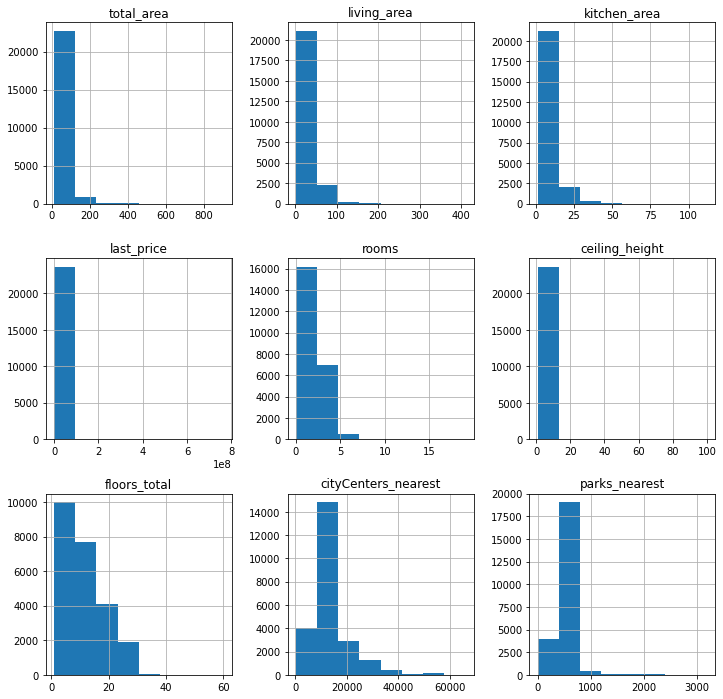

In [ ]:
col_list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms',
            'ceiling_height', 'floor_type', 'floors_total', 'cityCenters_nearest', 'parks_nearest']
data[col_list].hist(bins=8, grid=True, figsize=(12, 12))
plt.show()

Посмотрим также на описание данных в каждом из этих столбцов.

In [ ]:
col_list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms',
            'ceiling_height', 'floor_type', 'floors_total', 'cityCenters_nearest', 'parks_nearest']

for col, values in data[col_list].items():
  print(col)
  print(values.describe())
  print()

total_area
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

living_area
count    23699.000000
mean        34.605391
std         22.255339
min          2.000000
25%         19.000000
50%         29.900000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

kitchen_area
count    23699.000000
mean        10.462232
std          5.751343
min          1.300000
25%          7.000000
50%          9.100000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

last_price
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

rooms
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.0

**Не похожи на аномальные** значения в столбцах:
* `last_price` (значения вполне правдоподобные, и среднее не слишком сильно отличается от медианы)
* `floor_type` (вполне ожидаемо подавляющее число квартир находится не на первом и не на последнем этаже)
* `floors_total` (значения вполне правдоподобные, и среднее не слишком сильно отличается от медианы)
* `cityCenters_nearest` (здесь даже гистограмма визуально похожа на нормальное распределение)

**Аномальные значения** присутствуют в столбцах:
* `total_area` (900 - это неправдоподобно много)
* `living_area`, `kitchen_area` (возможно, здесь аномалии связаны со слишком большими значениями в `total_area`)
* `rooms` (19 комнат - это подозрительно, как и 0)
* `ceiling_height` (тоже неправдоподобно большие значения наряду с неправдоподобно маленькими: 100 и 1 м)
* `parks_nearest` (1 м - слишком маленькое значение)

Обработаем замеченные аномалии.

Если окажется, что природа аномалии понятна и данные действительно искажены, то восстановим корректное значение.

Иначе удалим выбивающиеся значения.


**Аномалии в `total_area`, `living_area`, `kitchen_area`**

Построим графики box plot и гистограммы с большим количеством "корзин", чтобы лучше разобраться в аномальных значениях.

Начнем со столбца `total_area`.

Возможно, если убрать аномальные значения из него, остальные параметры площади придут в норму тоже.

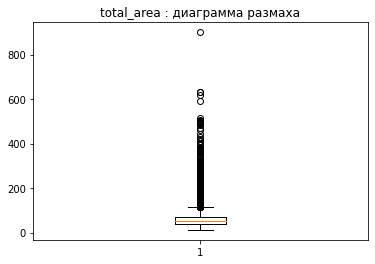

In [ ]:
plt.boxplot(data['total_area'])
plt.title('total_area : диаграмма размаха')
plt.show()

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
Добавила названия. Спасибо за напоминание.

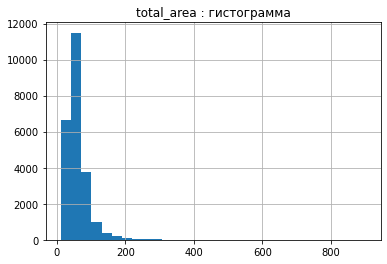

In [ ]:
data['total_area'].hist(bins=30)
plt.title('total_area : гистограмма')
plt.show()

Значения более 200 - редкие аномалии. Удалим их.

После каждого удаления проверяем число оставшихся в таблице строк, чтобы убедиться в сохранности важных данных.

In [ ]:
data = data[data['total_area']<200]
data.shape[0]

23468

Посмотрим на обновленные графики.

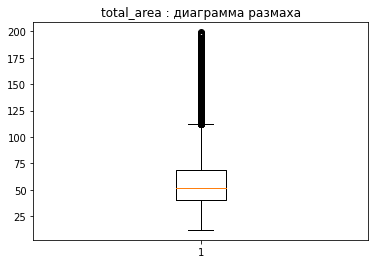

In [ ]:
plt.boxplot(data['total_area'])
plt.title('total_area : диаграмма размаха')
plt.show()

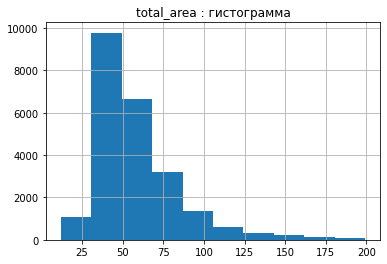

In [ ]:
data['total_area'].hist(bins=10)
plt.title('total_area : гистограмма')
plt.show()

Теперь заметно, что строки со значениями `total_area` меньше 20 и больше 105 - это тоже аномалии, которые можно удалить.

In [ ]:
data = data[(data['total_area']<105) & (data['total_area']>20)]
data.shape[0]

22026

Посмотрим на обновленные гистограммы всех трех столбцов.

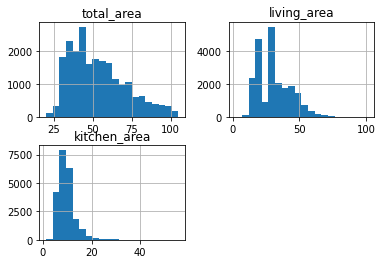

In [ ]:
data[['total_area', 'living_area', 'kitchen_area']].hist(bins=20)
plt.show()

Построим график box plot для `living_area`.

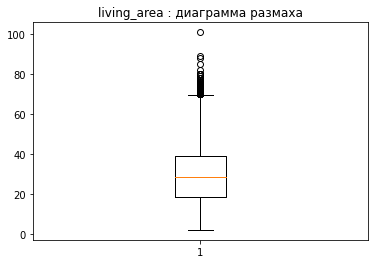

In [ ]:
plt.boxplot(data['living_area'])
plt.title('living_area : диаграмма размаха')
plt.show()

Удалим строки, где `living_area` больше 70 и меньше 10.

In [ ]:
data = data[(data['living_area']<70) & (data['living_area']>10)]
data.shape[0]

21892

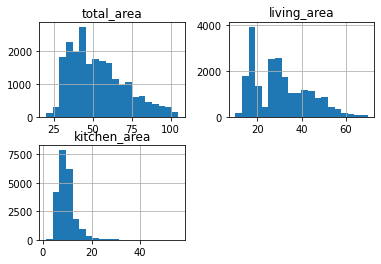

In [ ]:
data[['total_area', 'living_area', 'kitchen_area']].hist(bins=20)
plt.show()

После удаления аномальных значений гистограммы столбцов `total_area` и `kitchen_area` приблизились к нормальному распределению.

`living_area` - тоже, но в бимодальном варианте. Это может быть связано с различными планировками помещений. Попытаемся проверить связь пиков распределения с количеством комнат.

Для этого выясним, какое количество комнат характерно для каждого пика гистограммы, и построим раздельные гистограммы для квартир с этим количеством комнат.

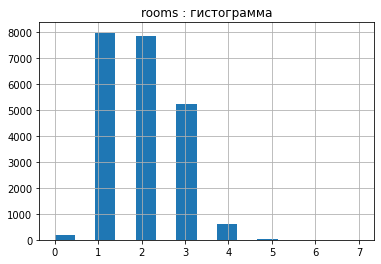

In [ ]:
data['rooms'].hist(bins=15)
plt.title('rooms : гистограмма')
plt.show()

In [ ]:
data[data['living_area']<25]['rooms'].value_counts()

1    7091
2     296
0     159
3      22
4       2
Name: rooms, dtype: int64

In [ ]:
data[data['living_area']>25]['rooms'].value_counts()

2    7488
3    5199
1     849
4     613
5      41
0      21
6       2
7       1
Name: rooms, dtype: int64

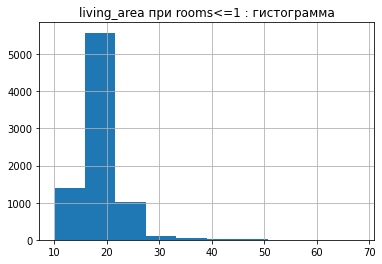

In [ ]:
data[data['rooms']<=1]['living_area'].hist()
plt.title('living_area при rooms<=1 : гистограмма')
plt.show()

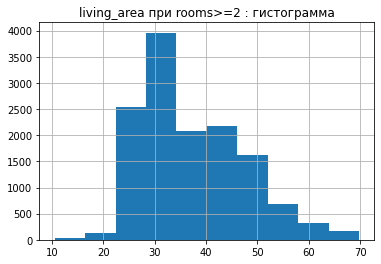

In [ ]:
data[data['rooms']>1]['living_area'].hist()
plt.title('living_area при rooms>=2 : гистограмма')
plt.show()

Да, похоже, что бимодальное распределение связано с разницей в планировках между однокомнатными квартирами и всеми остальными.

Значит, это не ошибка в сборе или обработке данных.

Можно переходить к следующему столбцу.

### Аномалии в `rooms`

Возможно, нулевое число комнат указано для студий.

Проверим это предположение.

In [ ]:
data[data['rooms'] == 0]['studio'].value_counts()

True     128
False     56
Name: studio, dtype: int64

In [ ]:
data[data['studio'] == True]['rooms'].value_counts()

0    128
1     11
Name: rooms, dtype: int64

Для подавляющего большинства студий пользователи указали 0 комнат. В то же время большинство квартир с 0 комнат - студии.

Присвоим всем студиям значение `rooms` = 0 и обозначим как студии все квартиры с 0 комнат.

In [ ]:
data.loc[data['rooms'] == 0, 'studio'] = True
data.loc[data['studio'] == True, 'rooms'] = 0

Проверим результат присвоения.

In [ ]:
data[['rooms', 'studio']].value_counts()

rooms  studio
1      False     7962
2      False     7854
3      False     5222
4      False      615
0      True       195
5      False       41
6      False        2
7      False        1
dtype: int64

### Аномалии в `ceiling_height`

Высота потолка меньше 2,4 м и больше 4 крайне маловероятна для жилых помещений.

С учетом возможных ошибок ввода, когда точка во float смещается, можно сразу удалить строки, в которых значение меньше 2,4 и больше 40.

In [ ]:
data = data[(data['ceiling_height']>=2.4) & (data['ceiling_height']<=40)]
data.shape[0]

21870

Построим box plot для обновленного столбца.

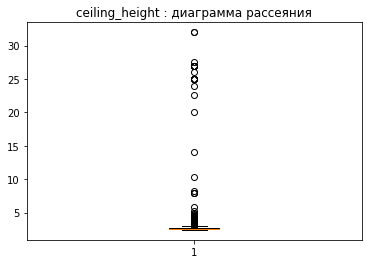

In [ ]:
plt.boxplot(data['ceiling_height'])
plt.title('ceiling_height : диаграмма рассеяния')
plt.show()

Исправим возможные смещения точки, разделяющей целую и дробную части float.

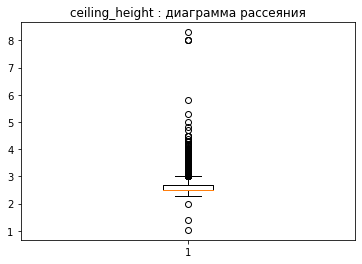

In [ ]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height'] / 10
plt.boxplot(data['ceiling_height'])
plt.title('ceiling_height : диаграмма рассеяния')
plt.show()

In [ ]:
data.shape[0]

21870

Теперь удалим явные аномалии (значения больше 4 и меньше 2,4)

In [ ]:
data = data[(data['ceiling_height']>=2.4) & (data['ceiling_height']<=4)]
data.shape[0]

21838

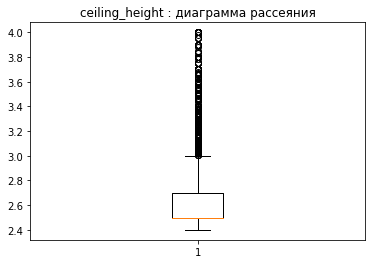

In [ ]:
plt.boxplot(data['ceiling_height'])
plt.title('ceiling_height : диаграмма рассеяния')
plt.show()

Несмотря на то что график показывает еще множество выбивающихся значений, считать их аномальными не будем, поскольку это нормальная высота потолка для некоторых зданий (например, дореволюционных зданий, сталинок и элитных новостроек).

Перейдем к следующему столбцу.

### Аномалии в `parks_nearest`

Посмотрим на описание данных этого столбца.

In [ ]:
data['parks_nearest'].describe()

count    21838.000000
mean       472.343278
std        197.056507
min          1.000000
25%        460.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64

Как мы уже отметили, в столбце присутствуют экстремально маленькие значения.

Построим гистограмму, на которой такие значения (менее 50 м) будут видны лучше, чем на общей.

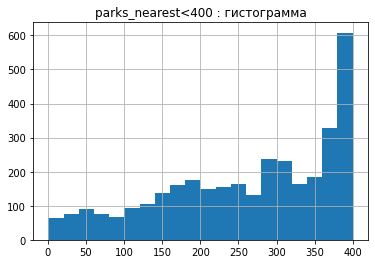

In [ ]:
data[data['parks_nearest']<400]['parks_nearest'].hist(bins=20)
plt.title('parks_nearest<400 : гистограмма')
plt.show()

Видим, что экстремально маленькие значения - не единичные выбросы. Частота плавно растет по мере увеличения расстояния.

Поэтому отсечем только совсем невозможные величины. Если парк находится буквально через дорогу от дома, до него все равно не менее 10 метров.

In [ ]:
data = data[data['parks_nearest']>=10]
data.shape[0]

21832

Посмотрим на обновленную гистограмму всех значений столбца.

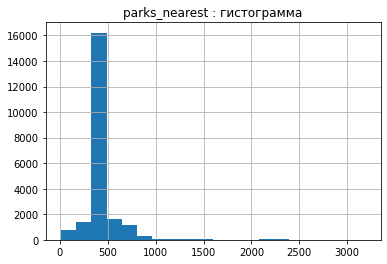

In [ ]:
data['parks_nearest'].hist(bins=20)
plt.title('parks_nearest : гистограмма')
plt.show()

Гистограмма похожа на нормальное распределение, хоть и с очень выраженным пиком и длинным хвостом в больших значениях.

Даже слишком большие на первый взгляд значения находятся в пределах реалистичного (не более 3190 м), поэтому их дополнительно обрабатывать не будем.

### Изучение скорости продажи квартир

Построим гистограмму для количества дней, прошедших между размещением объявления и продажей.

А также рассмотрим сами данные этого столбца.

count    19074.000000
mean       173.370033
std        211.588597
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64


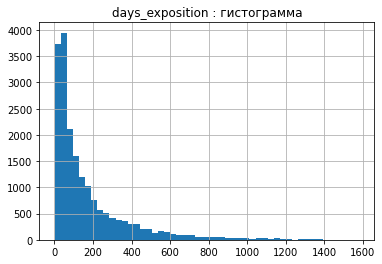

In [ ]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(bins=50)
plt.title('days_exposition : гистограмма')
plt.show()

На гистограмме видим распределение Пуассона, характерное для таких показателей.

Однако длинный неровный хвост больших значений выглядит несколько подозрительно.

Построим box plot, избегая пропущенных значений.

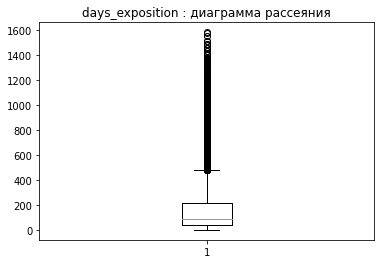

In [ ]:
plt.boxplot(data.loc[~data['days_exposition'].isna(), 'days_exposition'])
plt.title('days_exposition : диаграмма рассеяния')
plt.show()

Значение больше 500 рассматриваются как аномальные. Построим для них отдельную гистограмму.

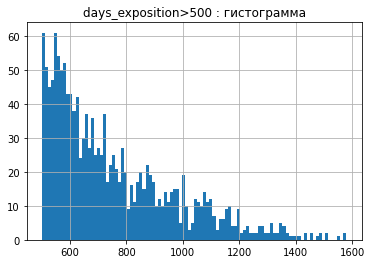

In [ ]:
data[data['days_exposition']>500]['days_exposition'].hist(bins=100)
plt.title('days_exposition>500 : гистограмма')
plt.show()

Увеличенный хвост гистограммы для аномально больших значений действительно выглядит не совсем характерно: он зубчатый.

Скорее всего, часть чрезмерно больших значений появилась не естественным образом и не соответствует реальности.

**Возможные причины появления аномалий в столбце `days_exposition`:**
* информация о завершении сделки не была получена вовремя
* неверно определена дата размещения объявления
* квартира действительно очень долго не находила покупателей из-за сочетания разнообразных обстоятельств (плохое состояние жилья, завышенная цена, дополнительные условия, мошенничество и т.п.)

In [ ]:
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Среднее: 173.3700325049806
Медиана: 92.0


**Выводы:**
* обычно продажа происходит спустя 92 дня после публикации объявления
* быстрыми можно считать продажи примерно до 44 дней
* долгими можно считать продажи примерно после 219 дней
* необычайно долгими можно считать продажи примерно после 400 дней

### Определение факторов, влияющих на стоимость

Определим факторы, которые больше всего влияют на общую стоимость объекта.

Обратим особое внимание на:
* общую площадь `total_area`
* жилую площадь `living_area`
* площадь кухни `kitchen_area`
* количество комнат `rooms`
* этаж, на котором расположена квартира `floor_type`
* дату размещения (день недели) `weekday`
* дату размещения (месяц) `month_exposition`
* дату размещения (год) `year_exposition`

Рассчитаем корреляцию между общей стоимостью и другими самостоятельными числовыми параметрами.

In [ ]:
data[['last_price',
    'total_images', 'total_area', 'rooms', 'ceiling_height',
    'floors_total', 'living_area','kitchen_area', 'floor', 'balcony',
    'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
    'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'
     ]].corr().round(2)['last_price'].sort_values(ascending=False)

last_price             1.00
total_area             0.67
living_area            0.52
kitchen_area           0.51
rooms                  0.37
ceiling_height         0.36
parks_around3000       0.27
total_images           0.16
floors_total           0.14
floor                  0.10
ponds_around3000       0.09
days_exposition        0.09
balcony                0.06
parks_nearest          0.05
ponds_nearest         -0.02
airports_nearest      -0.03
cityCenters_nearest   -0.27
Name: last_price, dtype: float64

**Предварительные выводы:**

* Высокой корреляции между общей стоимостью и каким-либо численным показателем из таблицы `data` не обнаружено.

* Заметна корреляция между общей стоимостью и всеми тремя характеристиками площади (`total_area`, `living_area`, `kitchen_area`).

* Умеренная корреляция между общей стоимостью и количеством комнат `rooms`, высотой потолка `ceiling_height`.
* А также очень близки к умеренной корреляции взаимосвязи общей стоимости и числа парков рядом `parks_around3000`, общей стоимости и расстояния до центра `cityCenters_nearest`.

Построим графики рассеяния для `last_price` и всех столбцов с числовыми значениями.

Чтобы их было проще воспринимать визуально, сделаем это в цикле, а не с помощью матрицы.

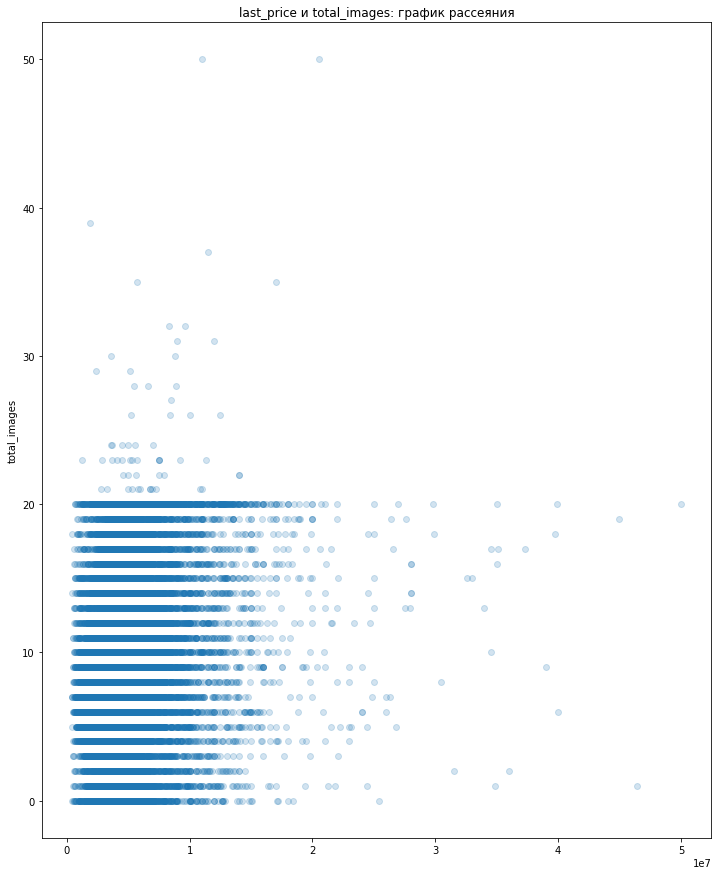

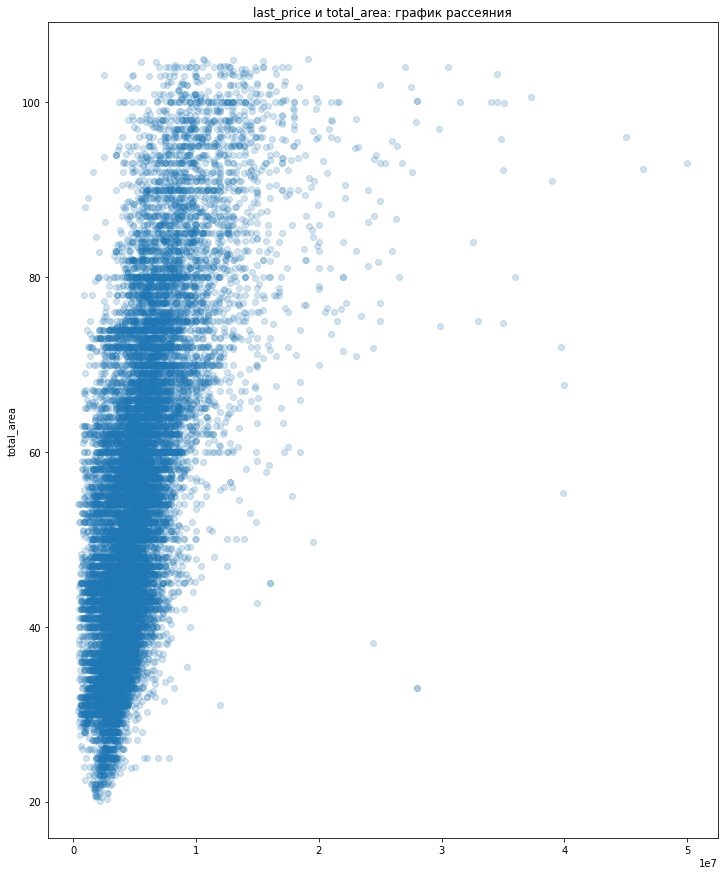

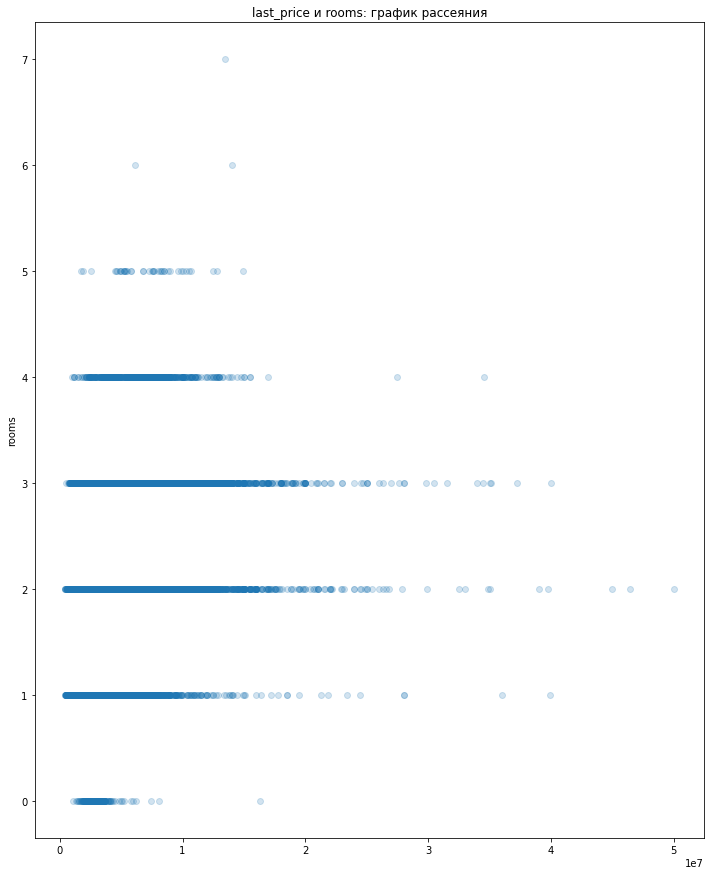

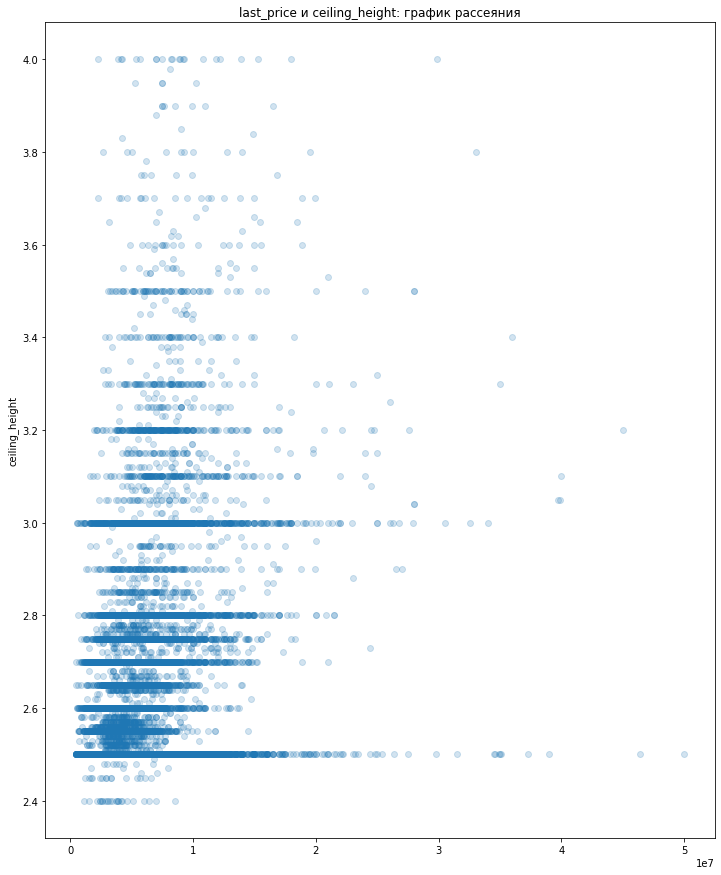

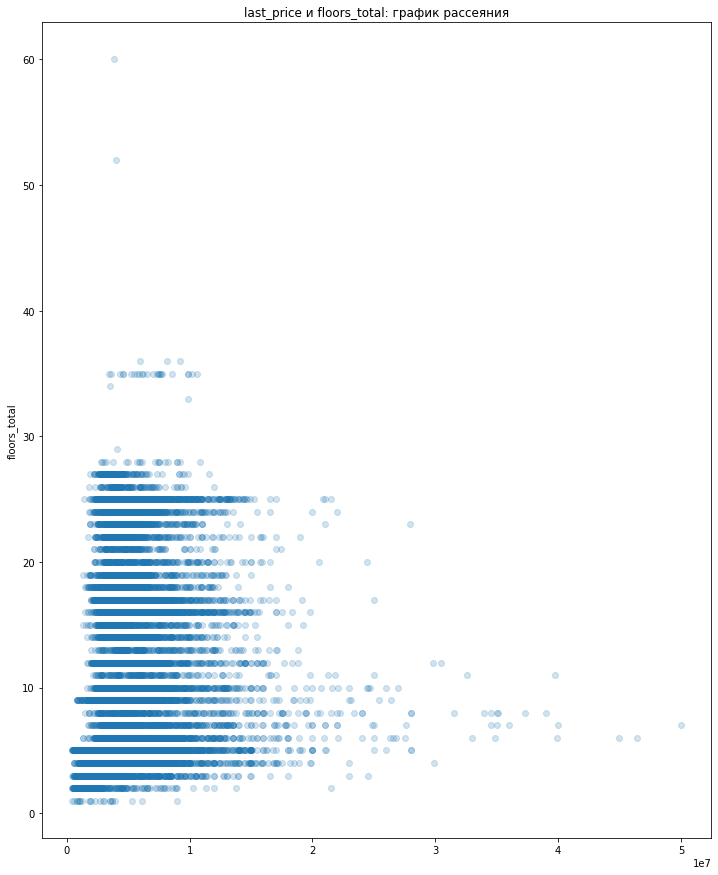

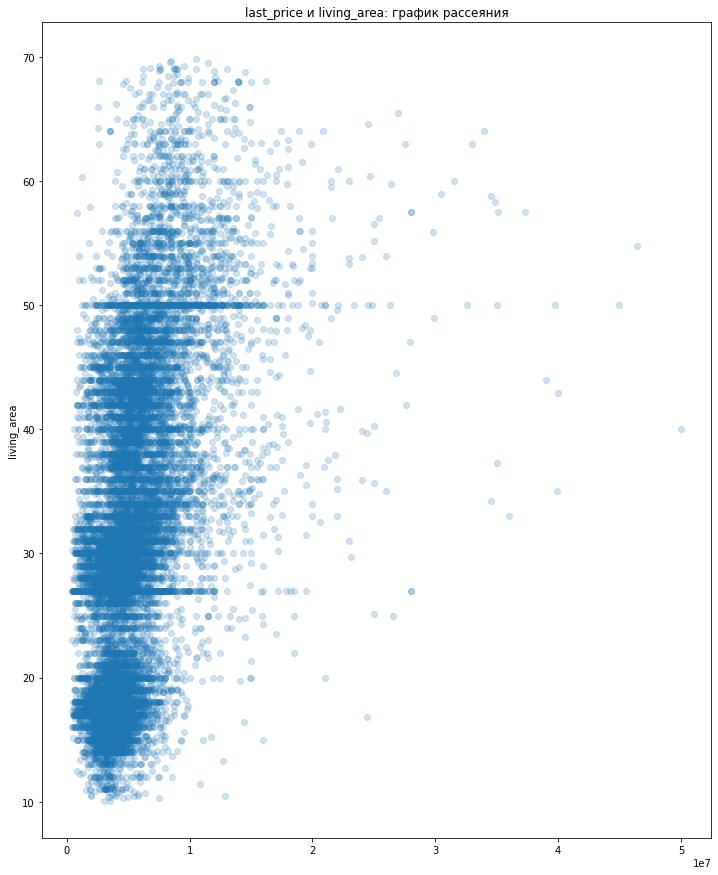

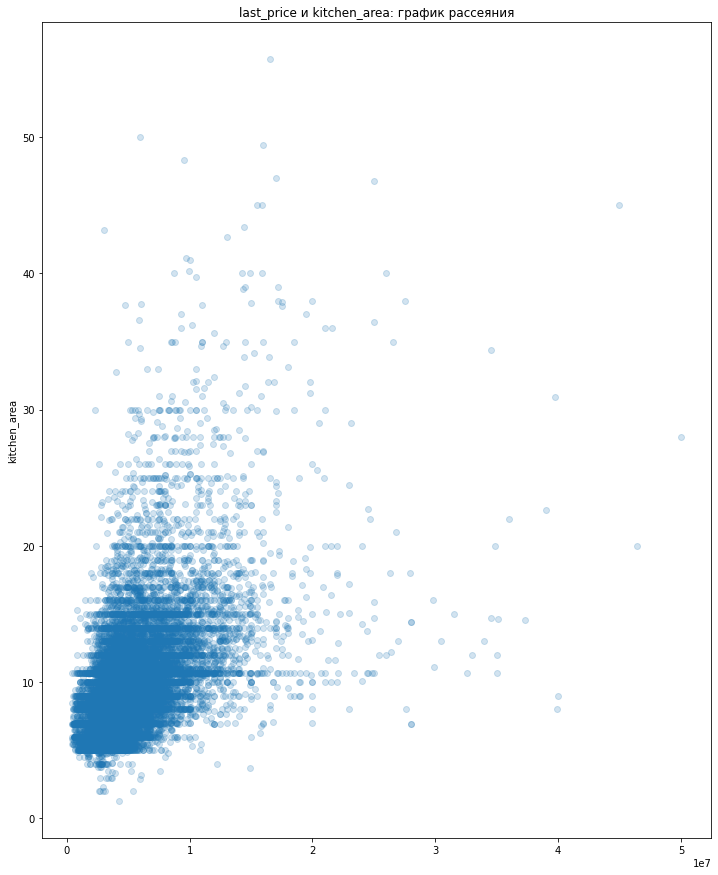

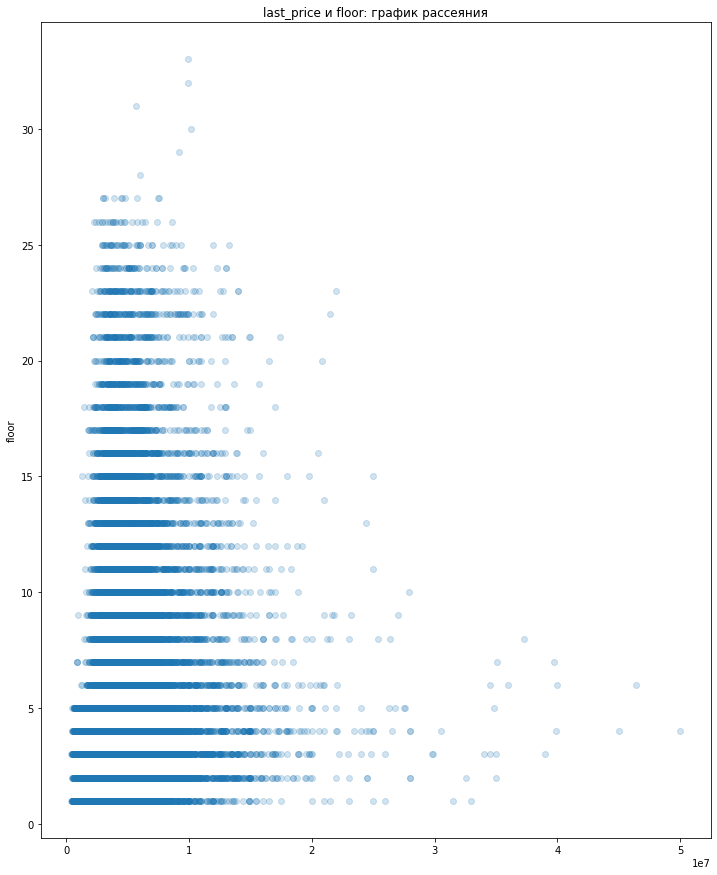

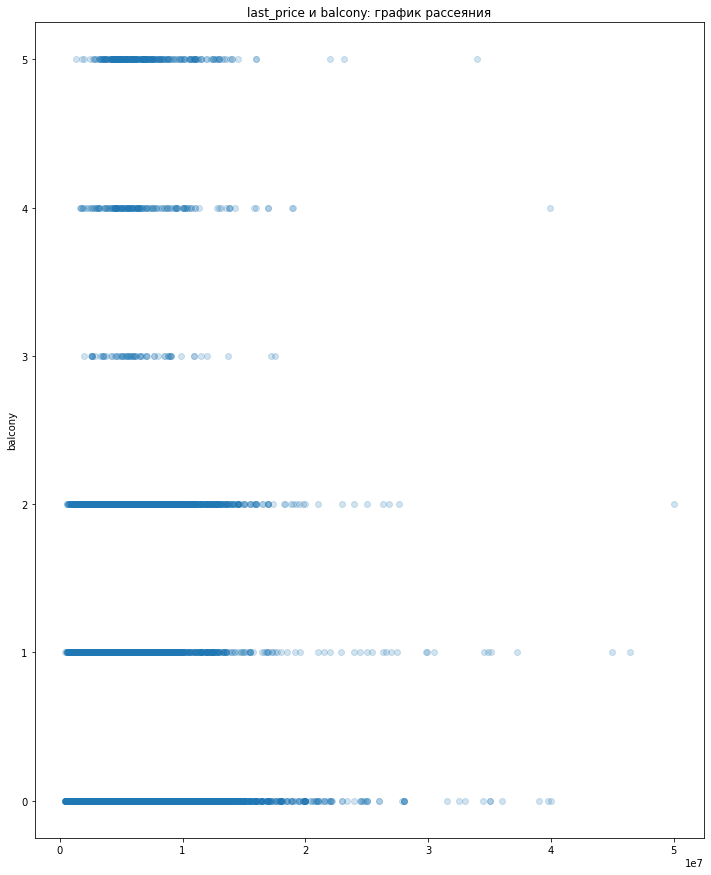

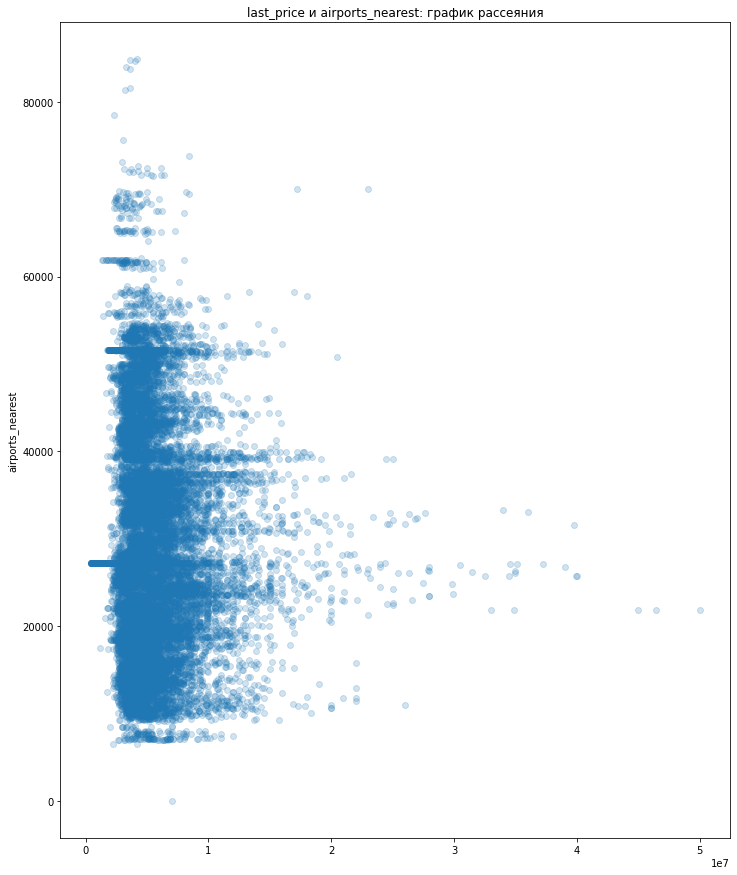

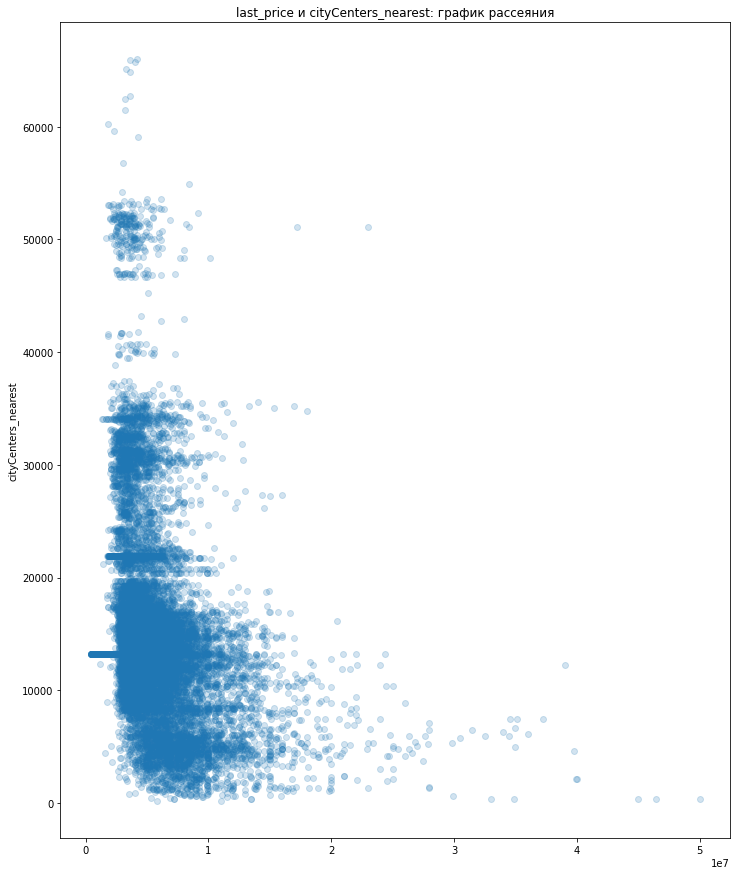

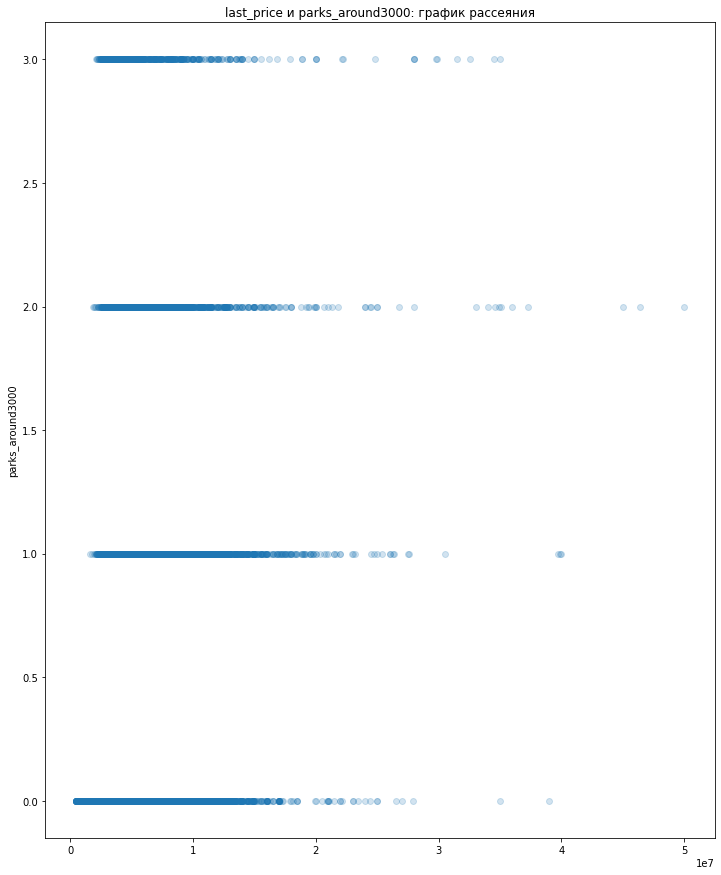

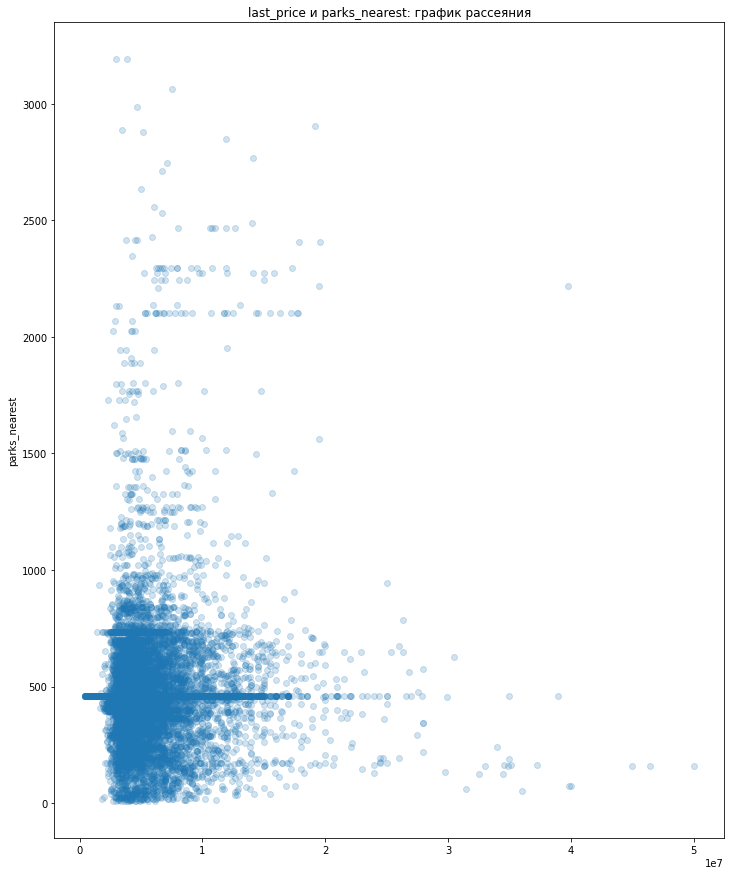

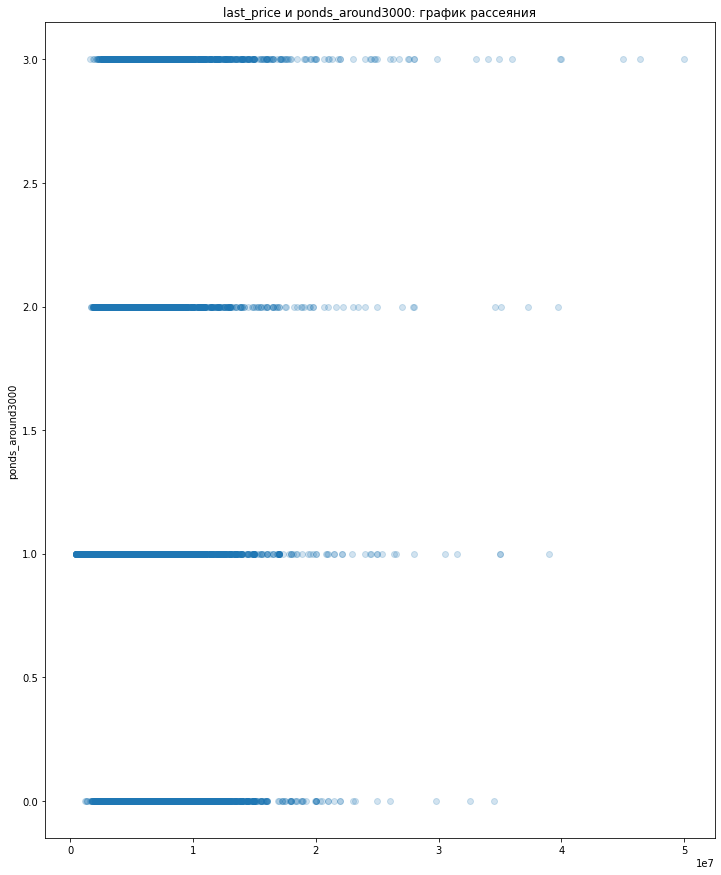

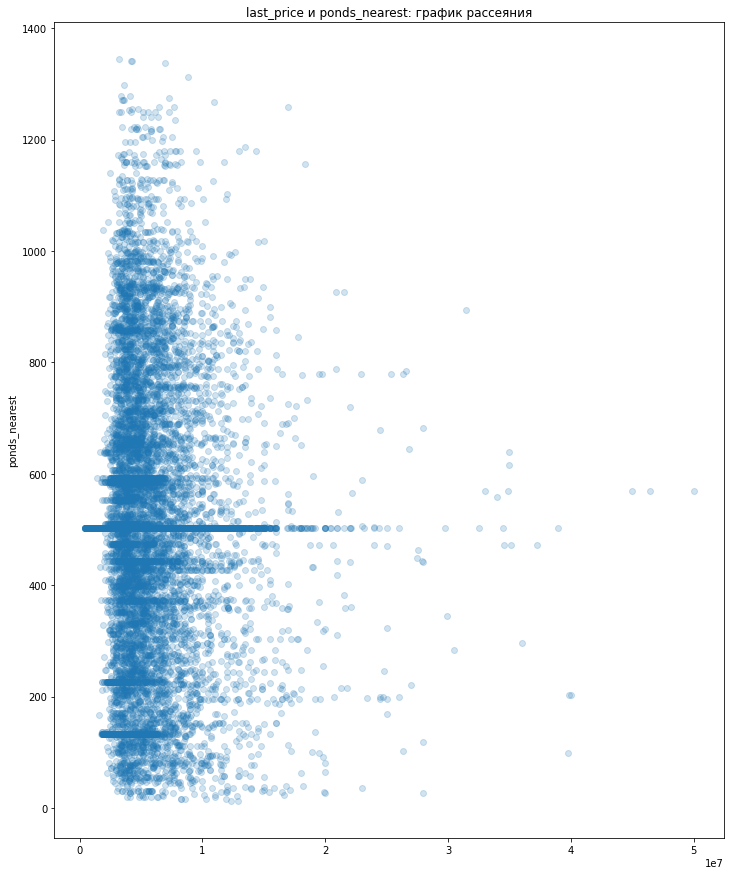

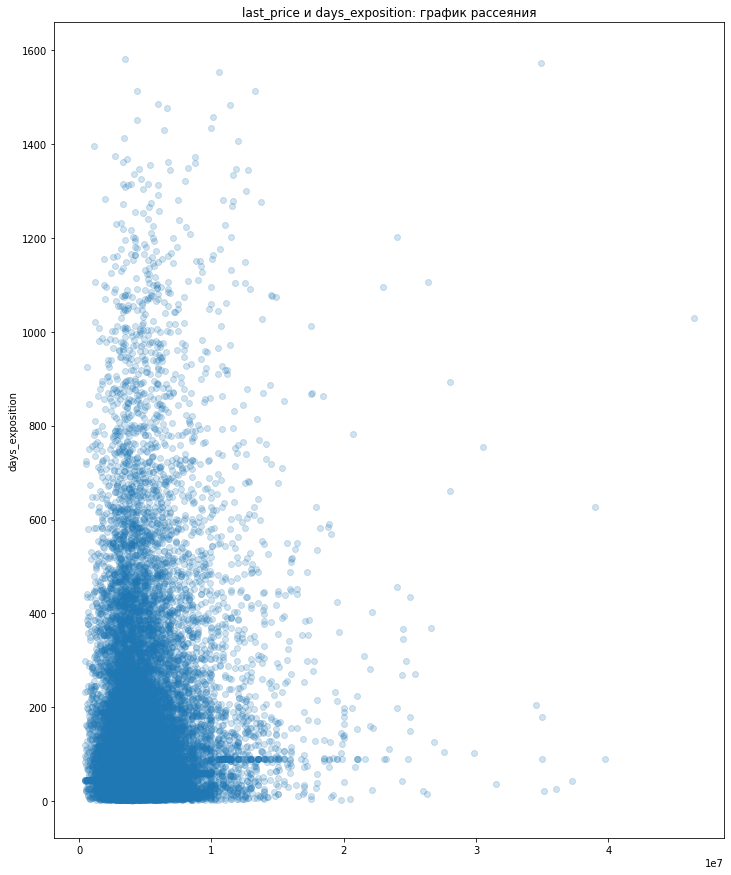

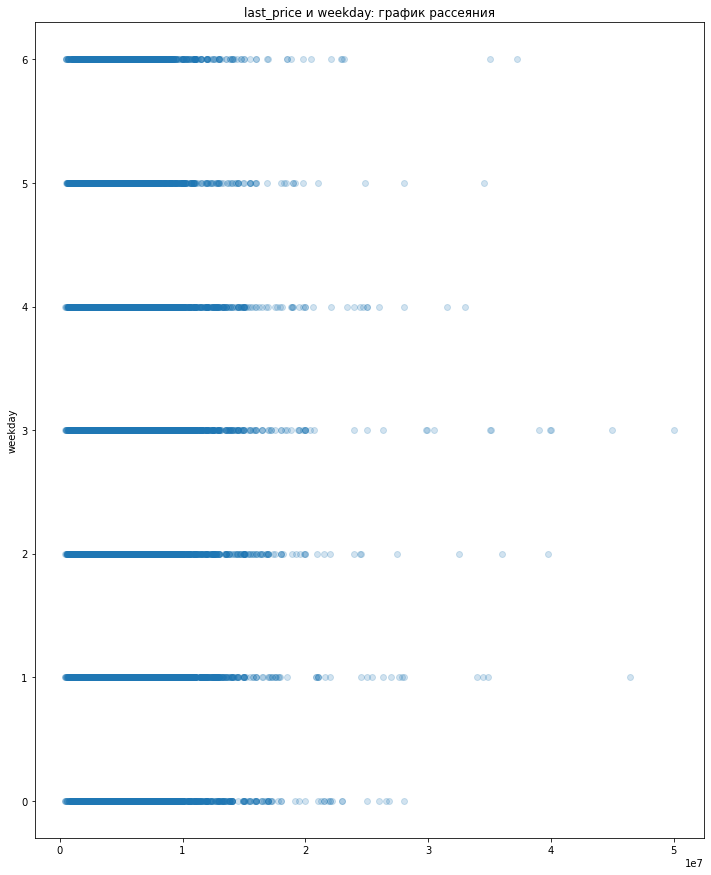

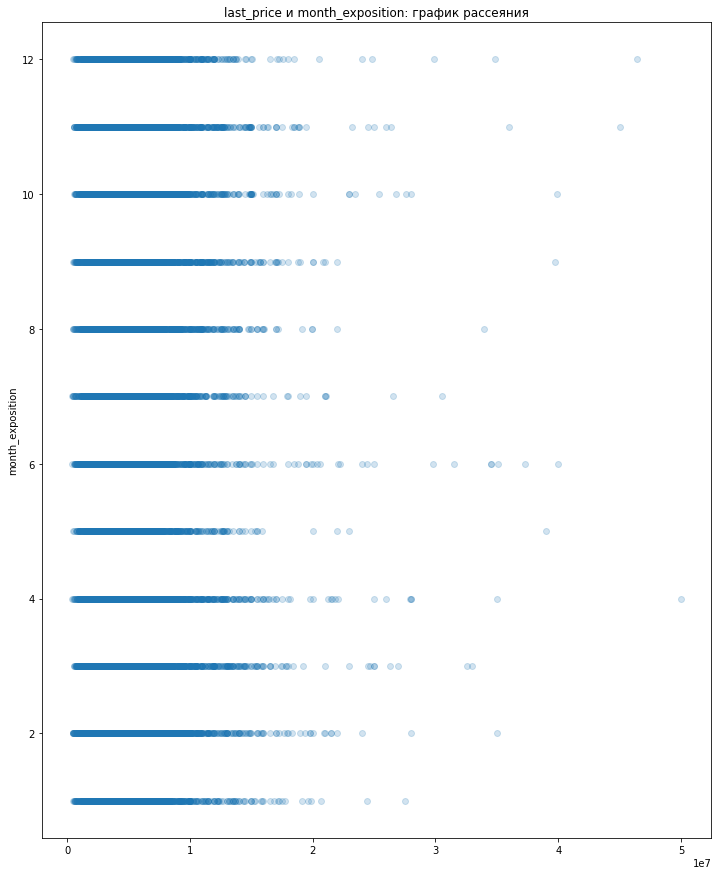

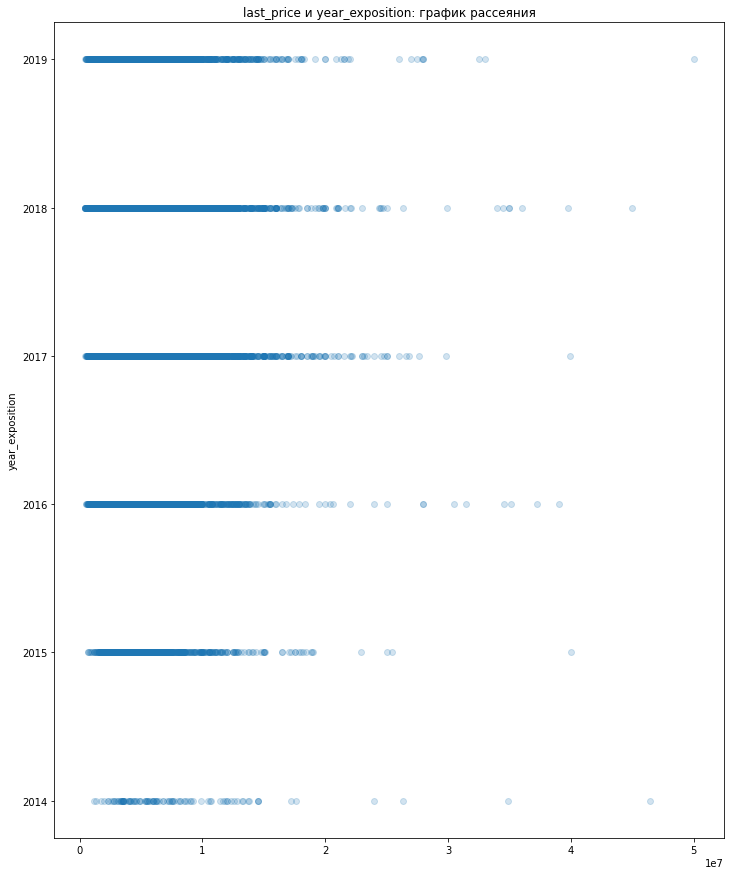

In [ ]:
col_list_corr = [
    'total_images', 'total_area', 'rooms', 'ceiling_height',
    'floors_total', 'living_area','kitchen_area', 'floor', 'balcony',
    'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
    'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
    'weekday', 'month_exposition', 'year_exposition'
     ]
for col in col_list_corr:
    a = f'last_price и {col}: график рассеяния'
    plt.figure(figsize=(12, 15))
    plt.scatter(x=data['last_price'], y=data[col], alpha=0.2)
    plt.title(a)
    plt.ylabel(ylabel=col)
    plt.show()

Матрицы рассеяния наглядно демонстрируют те связи, которые мы обнаружили, рассчитав корреляции.

Дополнительно графики демонстрируют, что на цену влияют:
* год:
  * характер влияния на этом графике не очевиден, ниже построим дополнительный
* месяц публикации
  * в середине лета цены на недвижимость оказываются ниже, чем в остальное время

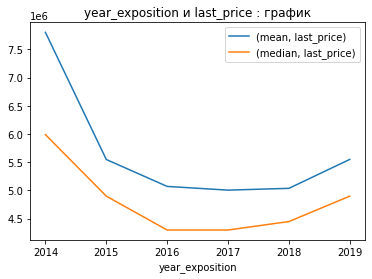

In [ ]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'median']).plot()
plt.title('year_exposition и last_price : график')
plt.legend(title=None)
plt.show()

На графике видно, что цены падали до 2016 года, а после 2017 стали расти.

Осталось рассмотреть связь общей стоимости и типа этажа.

Рассчитаем среднюю и медианную стоимость квартиры для каждого типа этажа.

In [ ]:
floor_type_pivot = data.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median'])
floor_type_pivot['mean'] = floor_type_pivot['mean'].astype('int')
floor_type_pivot

,mean,median
,last_price,last_price
floor_type,,
другой,5369669,4630000
первый,4232784,3825000
последний,4676456,4050000


Визуализируем распределение величин общей стоимости для разных типов этажа при помощи гистограмм.

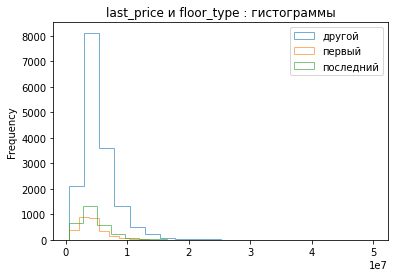

In [ ]:
data[data['floor_type']=='другой']['last_price'].plot(
    x='last_price', kind='hist', histtype='step', alpha=0.6, legend=True, label='другой', bins=20)

data[data['floor_type']=='первый']['last_price'].plot(
    x='last_price',kind='hist', histtype='step', alpha=0.6, legend=True, label='первый', bins=20)

data[data['floor_type']=='последний']['last_price'].plot(
    x='last_price',kind='hist', histtype='step', alpha=0.6, legend=True, label='последний', bins=20)
plt.title('last_price и floor_type : гистограммы')
plt.show()

**Выводы:**

* существенно на общую стоимость влияют показатели площади (общая площадь, жилая площадь и площадь кухни): чем больше площади, тем выше цена
* умеренно на общую стоимость влияют количество комнат (косвенно связано с площадью) и высота потолка (косвенно связана с совокупностью других показателей; в элитном жилье часто выше потолки): чем больше комнат и чем выше потолки, тем выше цена
* слабо на общую стоимость влияет число парков рядом: чем больше парков, тем выше цена
* слабо на общую стоимость влияет расстояние до центра: чем дальше от центра, тем выше цена
* заметно на общую стоимость влияет тип этажа: квартиры на первом и на последнем этаже в среднем дешевле всех остальных
* год размещения влияет на общую стоимость (до 2016 года цены на недвижимость снижались, а затем стали расти)
* в летние месяцы общая стоимость оказывается ниже, чем в остальное время


### Выделение населенных пунктов с самой высокой и низкой стоимостью квадратного метра

Сформируем сводную таблицу для 10 наиболее часто встречающихся населенных пунктов, где отразим название населенного пункта, среднюю цену за квадратный метр и количество объявлений.

In [ ]:
one_square_price_pivot = data.pivot_table(
    index='locality_name_clear', values='one_square_price', aggfunc='mean'
    ).merge(data.groupby('locality_name_clear')['total_images'].count(), on='locality_name_clear')

one_square_price_pivot = one_square_price_pivot.rename(
    columns={'total_images': 'count'}).sort_values(by='count', ascending=False).head(10)

one_square_price_pivot

,one_square_price,count
locality_name_clear,,
Санкт-Петербург,109920.953808,14052
Мурино,85967.294298,584
Кудрово,95298.472463,467
Шушары,78752.567448,431
Всеволожск,68688.625462,390
Пушкин,101334.268398,337
Колпино,75474.776407,334
Парголово,90417.201077,325
Гатчина,69012.654603,302


Отсортируем полученную сводную таблицу по цене за квадратный метр.

In [ ]:
one_square_price_pivot.sort_values(by='one_square_price', ascending=False)

,one_square_price,count
locality_name_clear,,
Санкт-Петербург,109920.953808,14052
Пушкин,101334.268398,337
Кудрово,95298.472463,467
Парголово,90417.201077,325
Мурино,85967.294298,584
Шушары,78752.567448,431
Колпино,75474.776407,334
Гатчина,69012.654603,302
Всеволожск,68688.625462,390


**Выводы по населенным пунктам:**

* самая высокая стоимость за квадратный метр в Санкт-Петербурге
* самая низкая стоимость за квадратный метр в Выборге

### Влияние расстояния до центра на цену квартиры в Санкт-Петербурге

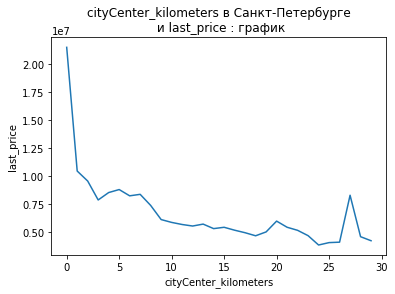

In [ ]:
spb_center = data.query('locality_name in "Санкт-Петербург"')[
    ['cityCenter_kilometers', 'last_price']].groupby('cityCenter_kilometers').mean().astype('int')
spb_center.plot(y='last_price', ylabel='last_price', legend=False)
plt.title('cityCenter_kilometers в Санкт-Петербурге\n и last_price : график')
plt.show()

**Вывод о расстоянии до центра:**

Средняя цена за квадратный метр в Санкт-Петербурге сильно зависит от расстояния до центра города. Чем меньше это расстояние, тем выше цена.

Особенно резко это заметно на расстояниях в пределах 10 км. При большем удалении от центра цена снижается более плавно.

Заметен небольшой пик цены на расстоянии около 27 км. Это может объясняться расположением в курортной зоне.

## Общий вывод

1. Ознакомились с данными (пункт 1) и выполнили предобработку данных (пункт 2):
* заполнили пропуски, сохранив максимум данных
* преобразовали неподходящие для анализа типы данных
* избавились от неявных дубликатов

2. Дополнили исходные данные новыми столбцами, значения которых сформировали на основе имеющихся (пункт 3):
* цена за квадратный метр
* день недели публикации
* месяц публикации
* год публикации
* тип этажа (первый, последний, другой)
* расстояние до центра в километрах

3. Изучили различные параметры и обработали аномальные значения (пункт 4), применяя методы статистического анализа и визуализации.

4. Пришли к следующим **заключениям:**

* Обычно продажа квартиры происходит спустя 95 дней после публикации объявления. Быстрыми можно считать продажи до 50 дней. Долгими можно считать продажи после 200 дней. Необычайно долгими можно считать продажи после 400 дней.

* Существенно на общую стоимость влияют показатели площади (общая площадь, жилая площадь и площадь кухни): чем больше площади, тем выше цена.
* Умеренно на общую стоимость влияют количество комнат (косвенно связано с площадью) и высота потолка (косвенно связана с совокупностью других показателей; в элитном жилье часто выше потолки): чем больше комнат и чем выше потолки, тем выше цена.
* Слабо на общую стоимость влияет число парков рядом: чем больше парков, тем выше цена.
* Слабо в среднем на общую стоимость влияет расстояние до центра: чем дальше от центра, тем выше цена. Для Санкт-Петербурга тенденция обратная.
* Заметно на общую стоимость влияет тип этажа: квартиры на первом и на последнем этаже в среднем дешевле всех остальных.
* Время размещения влияет на общую стоимость: до 2016 года цены на недвижимость снижались, а затем стали расти, плюс в летние месяцы общая стоимость оказывается ниже, чем в остальное время.

* Самая высокая стоимость за квадратный метр в Санкт-Петербурге.
* Самая низкая стоимость за квадратный метр в Выборге.

* Средняя цена за квадратный метр в Санкт-Петербурге сильно зависит от расстояния до центра города: чем меньше это расстояние, тем выше цена.